Dataset Name: Bejaia Region Dataset 
Data Source: https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset
Brief Description:

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans

In [7]:
pca = PCA()

In [16]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", skiprows=1)
df = pd.DataFrame(data)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 13.5+ KB
None


In [20]:
mapping = {'fire': 1, 'not fire': 0}
df['Classes'] =  df['Classes'].replace(mapping).astype(int)
# ndf =  df['Classes'].replace(mapping).astype(int)
# coleration = df[['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,5.358691e-17,NaN,0.181092,-0.210608,0.063970,-0.097489,0.291751,0.542760,0.568644,0.371489,0.557301,0.467585,0.306384
month,5.358691e-17,1.000000e+00,NaN,-0.035708,-0.088025,-0.007804,0.145180,-0.040746,-0.007624,-0.006211,-0.011281,-0.009113,0.003330,-0.066455
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,1.810918e-01,-3.570824e-02,NaN,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367,0.497810
RH,-2.106080e-01,-8.802546e-02,NaN,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067,-0.377328
Ws,6.396952e-02,-7.803641e-03,NaN,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637,-0.121408
Rain,-9.748921e-02,1.451800e-01,NaN,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914,-0.334392
FFMC,2.917513e-01,-4.074604e-02,NaN,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553,0.743637
DMC,5.427601e-01,-7.624391e-03,NaN,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759,0.616951
DC,5.686443e-01,-6.211283e-03,NaN,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911,0.588464


c:\Users\khale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


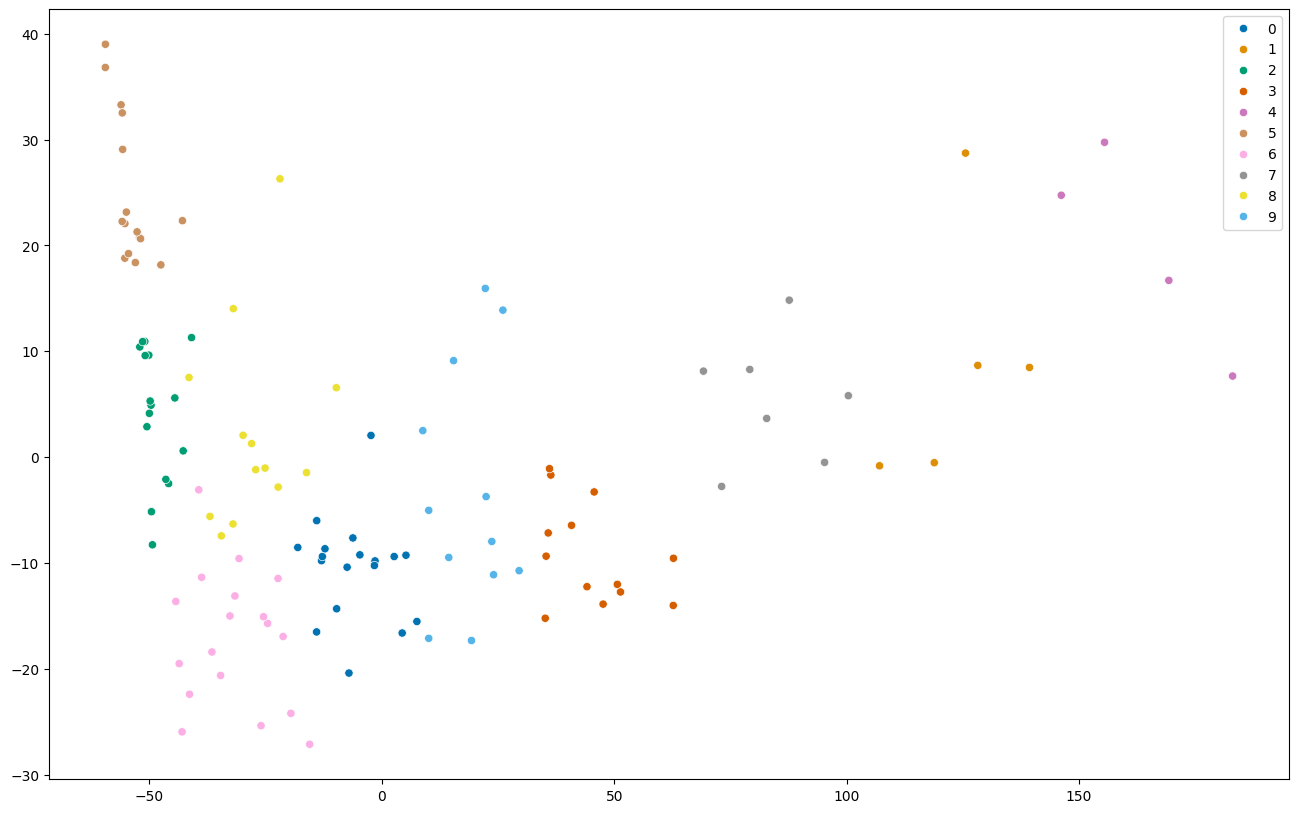

In [24]:
first = pca.fit_transform(df)
plt.figure(figsize=(16,10))

kmeans = KMeans(n_clusters=10).fit(first)

sns.scatterplot(x = first[:,0],
                y = first[:,1], hue = kmeans.labels_,
                palette='colorblind', legend='full')
